## Data Cleaning and Plotting in Python

#### About Dataset


The data is succesfully scrapped from imdb top netflix movies and tvshows.This dataset need clever programming knowledge for feature extraction also you can build a RECOMMENDATION system either GENRE prediction model



#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
df = pd.read_csv('movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [3]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
df.columns = map(str.title, df.columns)
df.head()

,Movies,Year,Genre,Rating,One-Line,Stars,Votes,Runtime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


#### Removing Duplicates

In [5]:
df = df.drop_duplicates()
df.shape

(9568, 9)

In [6]:
df.columns.str.strip()

Index(['Movies', 'Year', 'Genre', 'Rating', 'One-Line', 'Stars', 'Votes',
       'Runtime', 'Gross'],
      dtype='object')

#### Dropping unnecessary column

In [7]:
to_drop = ['One-Line', 'Gross']
df = df.drop(to_drop, axis = 1)
df

,Movies,Year,Genre,Rating,Stars,Votes,Runtime
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN
...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\n,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN


#### Separating Directors and Stars in the Stars Column

In [8]:
df[['Directors', 'Star']] = df['Stars'].str.split('Stars:', expand=True)
df.drop('Stars', inplace=True, axis=1)
df

,Movies,Year,Genre,Rating,Votes,Runtime,Directors,Star
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,"21,062",121.0,\n Director:\nPeter Thorwarth\n| \n,"\nPeri Baumeister, \nCarl Anton Koch, \nAlexan..."
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"17,870",25.0,\n \n,"\nChris Wood, \nSarah Michelle Gellar, \nLena ..."
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"885,805",44.0,\n \n,"\nAndrew Lincoln, \nNorman Reedus, \nMelissa M..."
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"414,849",23.0,\n \n,"\nJustin Roiland, \nChris Parnell, \nSpencer G..."
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,NaN,NaN,\n Director:\nMatthias Schweighöfer\n| \n,"\nMatthias Schweighöfer, \nNathalie Emmanuel, ..."
...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,NaN,NaN,\n Director:\nNicolai Rohde\n| \n,"\nFelix Klare, \nRomina Küper, \nAnna Maria Mü..."
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,NaN,NaN,\n,None
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,NaN,NaN,\n Director:\nOrlando von Einsiedel\n| \n ...,None
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,NaN,NaN,\n Director:\nJovanka Vuckovic\n| \n,"\nMorgan Taylor Campbell, \nIñaki Godoy, \nRhi..."


#### Remove special characters

In [9]:
df = df.replace('\n', '', regex=True)
df['Year'] = df['Year'].str.replace('[^0-9]', '')
df['Directors'] = df['Directors'].str.replace('|', '')
df['Directors'] = df['Directors'].str.replace('Director:', '')
df['Votes'] = df['Votes'].str.replace('[^0-9]', '')

df

,Movies,Year,Genre,Rating,Votes,Runtime,Directors,Star
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,20102022,"Drama, Horror, Thriller",8.2,885805,44.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,414849,23.0,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."
...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,NaN,NaN,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro..."
9995,Arcane,2021,"Animation, Action, Adventure",NaN,NaN,NaN,,None
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,NaN,NaN,Orlando von Einsiedel Star:Prince Harry,None
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,NaN,NaN,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J..."


#### Formatting Year colum to 4 digit

In [10]:
#Formatting the Year column to 4 digit 
df['Year'] = df['Year'].str.extract(r'^(\d{4})', expand = False)
df.head()

,Movies,Year,Genre,Rating,Votes,Runtime,Directors,Star
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,885805,44.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,414849,23.0,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


#### Split the multiple genre into column

In [11]:
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand = True)
df = df.drop(['Genre'], axis = 1)

df

,Movies,Year,Rating,Votes,Runtime,Directors,Star,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",Animation,Action,Adventure
2,The Walking Dead,2010,8.2,885805,44.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,414849,23.0,,"Justin Roiland, Chris Parnell, Spencer Grammer...",Animation,Adventure,Comedy
4,Army of Thieves,2021,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,NaN,NaN,NaN,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Drama,Thriller,None
9995,Arcane,2021,NaN,NaN,NaN,,None,Animation,Action,Adventure
9996,Heart of Invictus,2022,NaN,NaN,NaN,Orlando von Einsiedel Star:Prince Harry,None,Documentary,Sport,None
9997,The Imperfects,2021,NaN,NaN,NaN,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Adventure,Drama,Fantasy


#### Fill the Rating NaN values with average value

In [12]:
rating_mean = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(rating_mean)
df['Rating'] = df['Rating'].round(decimals=1)

df

,Movies,Year,Rating,Votes,Runtime,Directors,Star,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",Animation,Action,Adventure
2,The Walking Dead,2010,8.2,885805,44.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,414849,23.0,,"Justin Roiland, Chris Parnell, Spencer Grammer...",Animation,Adventure,Comedy
4,Army of Thieves,2021,6.9,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,6.9,NaN,NaN,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Drama,Thriller,None
9995,Arcane,2021,6.9,NaN,NaN,,None,Animation,Action,Adventure
9996,Heart of Invictus,2022,6.9,NaN,NaN,Orlando von Einsiedel Star:Prince Harry,None,Documentary,Sport,None
9997,The Imperfects,2021,6.9,NaN,NaN,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Adventure,Drama,Fantasy


#### Removing NaN values

In [13]:
df[['Year', 'Genre_1']] = df[['Year', 'Genre_1']].fillna('')
df[['Runtime', 'Votes']] = df[['Runtime', 'Votes']].fillna(0)
df

,Movies,Year,Rating,Votes,Runtime,Directors,Star,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",Animation,Action,Adventure
2,The Walking Dead,2010,8.2,885805,44.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,414849,23.0,,"Justin Roiland, Chris Parnell, Spencer Grammer...",Animation,Adventure,Comedy
4,Army of Thieves,2021,6.9,0,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,6.9,0,0.0,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Drama,Thriller,None
9995,Arcane,2021,6.9,0,0.0,,None,Animation,Action,Adventure
9996,Heart of Invictus,2022,6.9,0,0.0,Orlando von Einsiedel Star:Prince Harry,None,Documentary,Sport,None
9997,The Imperfects,2021,6.9,0,0.0,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Adventure,Drama,Fantasy


In [14]:
df['Runtime']= pd.to_numeric(df['Runtime'])
df['Votes'] = pd.to_numeric(df['Votes'])

df

,Movies,Year,Rating,Votes,Runtime,Directors,Star,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",Animation,Action,Adventure
2,The Walking Dead,2010,8.2,885805,44.0,,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Drama,Horror,Thriller
3,Rick and Morty,2013,9.2,414849,23.0,,"Justin Roiland, Chris Parnell, Spencer Grammer...",Animation,Adventure,Comedy
4,Army of Thieves,2021,6.9,0,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",Action,Crime,Horror
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,6.9,0,0.0,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Drama,Thriller,None
9995,Arcane,2021,6.9,0,0.0,,None,Animation,Action,Adventure
9996,Heart of Invictus,2022,6.9,0,0.0,Orlando von Einsiedel Star:Prince Harry,None,Documentary,Sport,None
9997,The Imperfects,2021,6.9,0,0.0,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Adventure,Drama,Fantasy


In [15]:
#### Filtering Year from 2019 to 2023 for sample plot

In [16]:
year_filter = df['Year'].apply(lambda x: x >= '2019')
df = df[year_filter].reset_index(drop = True)

df

,Movies,Year,Rating,Votes,Runtime,Directors,Star,Genre_1,Genre_2,Genre_3
0,Blood Red Sky,2021,6.1,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Action,Horror,Thriller
1,Masters of the Universe: Revelation,2021,5.0,17870,25.0,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",Animation,Action,Adventure
2,Army of Thieves,2021,6.9,0,0.0,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",Action,Crime,Horror
3,Outer Banks,2020,7.6,25858,50.0,,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",Action,Crime,Drama
4,The Last Letter from Your Lover,2021,6.8,5283,110.0,Augustine Frizzell,"Shailene Woodley, Joe Alwyn, Wendy Nottingham,...",Drama,Romance,None
...,...,...,...,...,...,...,...,...,...,...
4102,Totenfrau,2022,6.9,0,0.0,Nicolai Rohde,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Drama,Thriller,None
4103,Arcane,2021,6.9,0,0.0,,None,Animation,Action,Adventure
4104,Heart of Invictus,2022,6.9,0,0.0,Orlando von Einsiedel Star:Prince Harry,None,Documentary,Sport,None
4105,The Imperfects,2021,6.9,0,0.0,Jovanka Vuckovic,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Adventure,Drama,Fantasy


In [17]:
#### Sample Plot

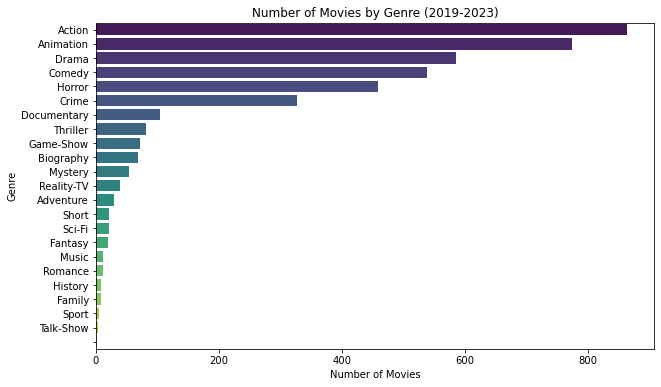

In [18]:
#Horizontal Bar
genre_counts = df['Genre_1'].explode().str.strip().value_counts()
genre_unique = df['Genre_1'].explode().str.strip().unique()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts, y=genre_unique,  orient='h', palette='viridis')
plt.ylabel('Genre')
plt.xlabel('Number of Movies')
plt.title('Number of Movies by Genre (2019-2023)')
plt.show()

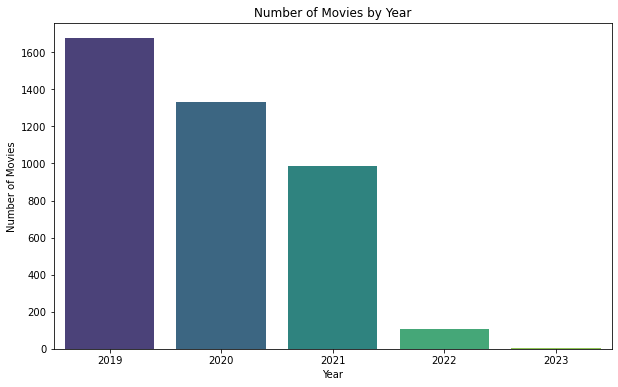

In [19]:
#Bar Graph
year_counts = df['Year'].explode().str.strip().value_counts()
year_unique = sorted(df['Year'].explode().str.strip().unique())
plt.figure(figsize=(10,6))
sns.barplot(year_unique, year_counts, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.show()


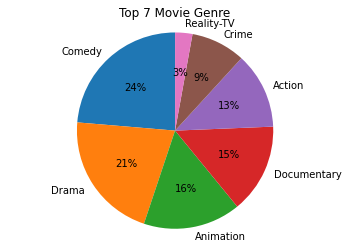

In [20]:
#Pie Chary
fig, ax = plt.subplots()
ax.pie(genre_counts[:7], labels = genre_counts[:7].index, autopct='%1.0f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Top 7 Movie Genre')
plt.show()

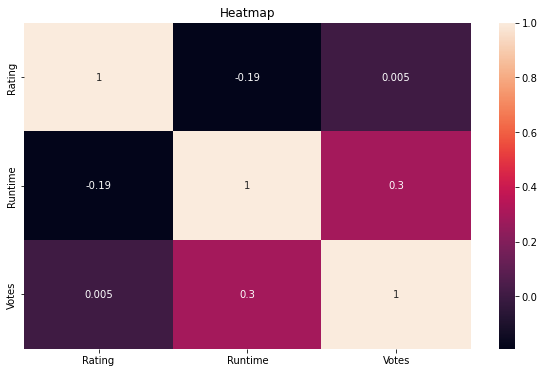

In [21]:
#Heatmap
df_rating = df[['Rating', 'Runtime', 'Votes']]
cor_movie = df_rating.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor_movie, annot=True)
plt.title('Heatmap')
plt.show()
